# Notebook to Collect new Anime Faces Dataset

### Collect Character URLs from MyAnimeList

In [71]:
import requests
from bs4 import BeautifulSoup
import string

In [94]:
base_url = 'https://myanimelist.net/character.php?letter='
char_urls = {}
for letter in string.ascii_uppercase:
    print(letter)
    char_urls[letter] = []
    url = base_url + letter
    r = requests.get(url)
    bs = BeautifulSoup(r.text,'lxml')
    tr = bs.findAll('tr')
    for x in tr:
        # don't accept manga-only characters for dataset
        desc = x.find('small')
        if desc and 'Anime' not in x.find('small').text:
            continue
        a = x.findAll('a')
        for lnk in a:
            if 'character' in lnk['href']:
                char_urls[letter].append(lnk['href'])
                break

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [96]:
# remove repeats
for letter in char_urls:
    char_urls[letter] = list(set(char_urls[letter]))
    print(len(char_urls[letter]))

2468
778
757
652
479
993
711
2697
1484
334
4951
574
3689
1763
1542
294
35
689
4436
3060
549
308
522
16
1560
149


In [87]:
print(char_urls)

{'A': [], 'B': [], 'C': [], 'D': [], 'E': [], 'F': [], 'G': [], 'H': [], 'I': [], 'J': [], 'K': [], 'L': [], 'M': [], 'N': [], 'O': [], 'P': [], 'Q': [], 'R': [], 'S': [], 'T': [], 'U': [], 'V': [], 'W': [], 'X': [], 'Y': [], 'Z': []}


## Collect Corresponding Images

In [2]:
import shutil
import os

In [98]:
done = {letter:False for letter in char_urls}

In [101]:
for letter in char_urls:
    print(letter)
    if done[letter]:
        continue
    urls = char_urls[letter]
    base_dir = './' + letter
    os.makedirs('./'+letter,exist_ok = True)
    for char_url in urls:
        char = char_url.split('/')[-1]
        char_url += './pictures'
        r = requests.get(char_url)
        bs = BeautifulSoup(r.text,'lxml')
        links = bs.findAll('a', rel = 'gallery-character')
        for i,a in enumerate(links):
            img = a.find('img')['src']
            response = requests.get(img,stream=True)
            with open(base_dir + '/' + char + '_' + str(i) + '.png','wb') as out_file:
                shutil.copyfileobj(response.raw,out_file)
            del response
    done[letter]=True

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


## Detect Faces using Cascade

In [19]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# https://github.com/nagadomi/lbpcascade_animeface
def detect(filename, counter, cascade_file = "lbpcascade_animeface.xml"):
    if not os.path.isfile(cascade_file):
        raise RuntimeError("%s: not found" % cascade_file)
    name = filename.split('/')[-1][:-4]
    cascade = cv2.CascadeClassifier(cascade_file)
    try:
        image = cv2.imread(filename, cv2.IMREAD_COLOR)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        return
#     gray = cv2.equalizeHist(gray)
    
    faces = cascade.detectMultiScale(gray,
                                     # detector options
                                     scaleFactor = 1.1,
                                     minNeighbors = 5,
                                     minSize = (24, 24))
    # crop faces
    for i,(x, y, w, h) in enumerate(faces):
        face = cv2.resize(image[y:y + h,x:x + w],(96,96))
        cv2.imwrite('./faces/'+name+'_'+str(i)+'.png',face)
        counter[0] += 1

In [75]:
img = detect('./raw/E/Violet_Evergarden_9.png')

[1]


In [84]:
counter = [0]
for letter in string.ascii_uppercase:
    print(letter)
    mypath = './raw/'+letter
    imgfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
    for imgname in imgfiles:
        detect(mypath + '/' + imgname,counter)
        if counter[0]%250 == 0:
            print(counter[0])

A
250
250
250
250
250
250
B
C
500
500
D
E
F
750
750
750
G
H
1000
I
1250
1250
J
K
1500
1750
L
M
2000
2000
2000
N
2250
2250
2250
2250
2250
2250
2250
2250
2250
O
P
Q
R
2500
S
2750
T
3000
U
V
W
3250
3250
X
Y
Z


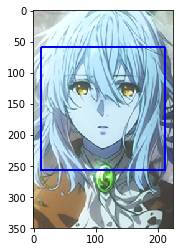

In [49]:
plt.imshow(img)

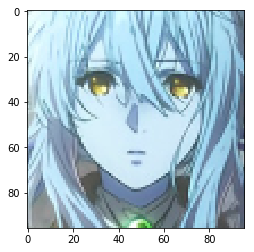

In [61]:
plt.imshow(img)